Introduction to the College Placement Dataset

The College Placement dataset contains valuable information about students and their placement outcomes, making it an important resource for analyzing factors that influence employability and career readiness among graduates. This dataset is commonly used in data science and machine learning projects to develop predictive models that can determine whether a student is likely to be placed based on various academic and personal attributes. It typically includes details such as students’ academic performance, specialization, degree type, gender, work experience, and salary information for those who received job offers. By examining these features, researchers can gain insights into the relationship between academic achievements and successful campus placements.

The dataset serves as an effective tool for colleges, educators, and career counselors to identify key determinants of student placement success and to design strategies that improve employability. From a data analytics perspective, it allows for classification, correlation, and statistical analysis to uncover meaningful patterns and trends in placement data. It can also be used to build and evaluate machine learning models such as logistic regression, decision trees, and random forests to predict placement outcomes.

Overall, the College Placement dataset provides a comprehensive view of the student placement process and highlights the significance of academic performance, experience, and personal characteristics in shaping career opportunities. It supports the development of data-driven strategies to enhance student preparedness and institutional placement performance, contributing to better career outcomes and improved decision-making in educational environments

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
df=pd.read_csv(r"C:\datascience\project\machine learning 4\CollegePlacement.csv")
print("first 5 row",df.head())
print("last 5 row",df.tail())

first 5 row   College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3               

In [5]:
#data cleaning
df.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [6]:
df.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

In [7]:
df['Placement'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,0
1,CLG0061,97,5.52,5.37,8,No,7,8,0,0
2,CLG0036,109,5.36,5.83,9,No,3,1,1,0
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,0
4,CLG0004,96,7.91,7.69,7,No,8,10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,1
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,0
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,0
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'IQ'),
  Text(1, 0, 'Prev_Sem_Result'),
  Text(2, 0, 'CGPA'),
  Text(3, 0, 'Academic_Performance'),
  Text(4, 0, 'Extra_Curricular_Score'),
  Text(5, 0, 'Communication_Skills'),
  Text(6, 0, 'Projects_Completed'),
  Text(7, 0, 'Placement')])

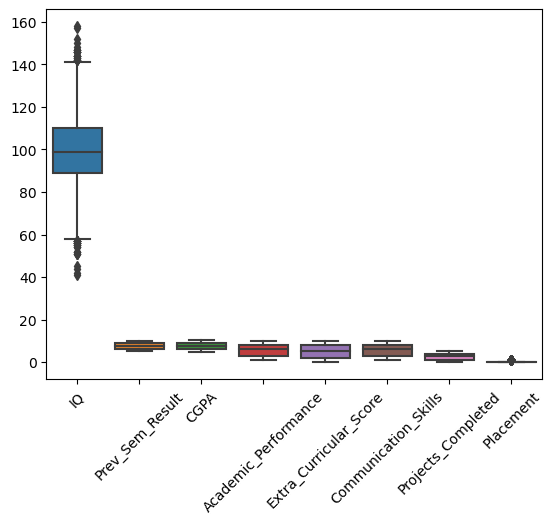

In [9]:
sns.boxplot(df)
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'IQ'),
  Text(1, 0, 'Prev_Sem_Result'),
  Text(2, 0, 'CGPA'),
  Text(3, 0, 'Academic_Performance'),
  Text(4, 0, 'Extra_Curricular_Score'),
  Text(5, 0, 'Communication_Skills'),
  Text(6, 0, 'Projects_Completed'),
  Text(7, 0, 'Placement')])

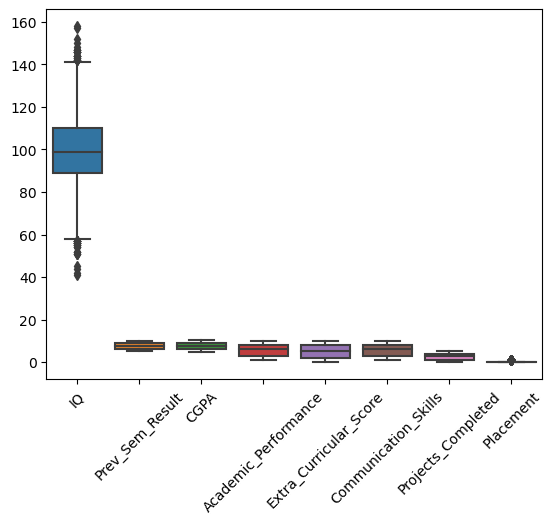

In [10]:
sns.boxplot(df)
plt.xticks(rotation=45)


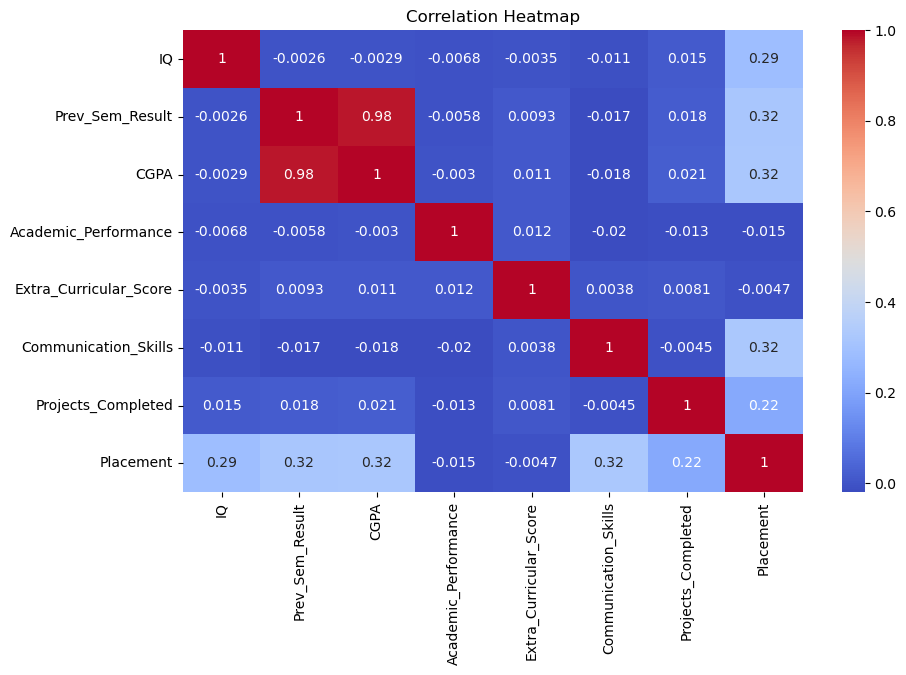

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
x=df[['IQ','CGPA','Academic_Performance','Extra_Curricular_Score','Communication_Skills','Projects_Completed']]
y=df['Placement']

In [13]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter= 1000)
# fitting model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [15]:
#Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred) )
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred) ))
print("Accuracy:", metrics. accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.097
Mean Squared Error: 0.097
Root Mean Squared Error: 0.31144823004794875
Accuracy: 0.903


using svm

In [17]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x. transform(X_test)


from sklearn.svm import SVC 
classifier = SVC(kernel='linear' ,random_state=0)
classifier.fit(X_train, y_train)


#Predicting the test set result
y_pred= classifier.predict(X_test)

# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f'% (accuracy*100))
test=[[100,5.5,7,8,6,9]]
test=st_x.transform(test)
y_pred_2=classifier.predict(test)
print(y_pred_2)

Accuracy: 89.95
[0]


c:\Users\ruksana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ruksana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
